In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data of the employees who have left the company

In [2]:
data = pd.read_excel(r"C:\Users\INTELLECT\TakenMind\attrition.xlsx", "Employees who have left")

In [3]:
data

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low


In [4]:
data = data.drop("Emp ID", axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3571 non-null   float64
 1   last_evaluation        3571 non-null   float64
 2   number_project         3571 non-null   int64  
 3   average_montly_hours   3571 non-null   int64  
 4   time_spend_company     3571 non-null   int64  
 5   Work_accident          3571 non-null   int64  
 6   promotion_last_5years  3571 non-null   int64  
 7   dept                   3571 non-null   object 
 8   salary                 3571 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 251.2+ KB


In [6]:
# Checking for Missing Value
round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
promotion_last_5years    0.0
dept                     0.0
salary                   0.0
dtype: float64

### Preprocessing 

In [7]:
bins = np.linspace(min(data["satisfaction_level"]),max(data["satisfaction_level"]),3)
group_names = ["Unsatisfied","Satisfaied"]

data["satisfaction_level_binned"] = pd.cut(data["satisfaction_level"], bins, labels=group_names, include_lowest=True)

In [8]:
bins = np.linspace(min(data["average_montly_hours"]),max(data["average_montly_hours"]),4)
group_names = ["Low Workload", "Moderate Workload", "High Workload"]

data["average_montly_hours_binned"] = pd.cut(data["average_montly_hours"], bins, labels=group_names, include_lowest=True)

In [9]:
bins = np.linspace(min(data["number_project"]),max(data["number_project"]),4)
group_names = ["Low Project", "Moderate Project", "High Project"]

data["number_project_binned"] = pd.cut(data["number_project"], bins, labels=group_names, include_lowest=True)

In [10]:
bins = np.linspace(min(data["last_evaluation"]),max(data["last_evaluation"]),4)
group_names = ["Low", "Medium", "High"]

data["last_evaluation_binned"] = pd.cut(data["last_evaluation"], bins, labels=group_names, include_lowest=True)

In [11]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,satisfaction_level_binned,average_montly_hours_binned,number_project_binned,last_evaluation_binned
0,0.38,0.53,2,157,3,0,0,sales,low,Unsatisfied,Low Workload,Low Project,Low
1,0.80,0.86,5,262,6,0,0,sales,medium,Satisfaied,High Workload,Moderate Project,High
2,0.11,0.88,7,272,4,0,0,sales,medium,Unsatisfied,High Workload,High Project,High
3,0.72,0.87,5,223,5,0,0,sales,low,Satisfaied,Moderate Workload,Moderate Project,High
4,0.37,0.52,2,159,3,0,0,sales,low,Unsatisfied,Low Workload,Low Project,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,0.40,0.57,2,151,3,0,0,support,low,Unsatisfied,Low Workload,Low Project,Low
3567,0.37,0.48,2,160,3,0,0,support,low,Unsatisfied,Low Workload,Low Project,Low
3568,0.37,0.53,2,143,3,0,0,support,low,Unsatisfied,Low Workload,Low Project,Low
3569,0.11,0.96,6,280,4,0,0,support,low,Unsatisfied,High Workload,High Project,High


In [12]:
extract = [
    
    "satisfaction_level_binned", 
    "last_evaluation_binned", 
    "number_project_binned", 
    "average_montly_hours_binned", 
    "time_spend_company", 
    "Work_accident", 
    "promotion_last_5years", 
    "dept", "salary"

]

In [13]:
df = data[extract]

In [14]:
df

,satisfaction_level_binned,last_evaluation_binned,number_project_binned,average_montly_hours_binned,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,Unsatisfied,Low,Low Project,Low Workload,3,0,0,sales,low
1,Satisfaied,High,Moderate Project,High Workload,6,0,0,sales,medium
2,Unsatisfied,High,High Project,High Workload,4,0,0,sales,medium
3,Satisfaied,High,Moderate Project,Moderate Workload,5,0,0,sales,low
4,Unsatisfied,Low,Low Project,Low Workload,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
3566,Unsatisfied,Low,Low Project,Low Workload,3,0,0,support,low
3567,Unsatisfied,Low,Low Project,Low Workload,3,0,0,support,low
3568,Unsatisfied,Low,Low Project,Low Workload,3,0,0,support,low
3569,Unsatisfied,High,High Project,High Workload,4,0,0,support,low


### Exporatory Data Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   satisfaction_level_binned    3571 non-null   category
 1   last_evaluation_binned       3571 non-null   category
 2   number_project_binned        3571 non-null   category
 3   average_montly_hours_binned  3571 non-null   category
 4   time_spend_company           3571 non-null   int64   
 5   Work_accident                3571 non-null   int64   
 6   promotion_last_5years        3571 non-null   int64   
 7   dept                         3571 non-null   object  
 8   salary                       3571 non-null   object  
dtypes: category(4), int64(3), object(2)
memory usage: 154.1+ KB


In [16]:
df.describe()

,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000
mean,3.876505,0.047326,0.005321
std,0.977698,0.212364,0.072759
min,2.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000
max,6.000000,1.000000,1.000000


In [17]:
# Checking for Missing Value
round((df.isnull().sum() * 100/ len(df)),2).sort_values(ascending=False)

satisfaction_level_binned      0.0
last_evaluation_binned         0.0
number_project_binned          0.0
average_montly_hours_binned    0.0
time_spend_company             0.0
Work_accident                  0.0
promotion_last_5years          0.0
dept                           0.0
salary                         0.0
dtype: float64

In [18]:
# Handling duplicates
print("Duplicates in dataset:", df.duplicated().sum())

Duplicates in dataset: 3114


In [19]:
processed_df = df.drop_duplicates(keep = 'first')

In [20]:
processed_df.duplicated().sum()

0

In [21]:
processed_df

,satisfaction_level_binned,last_evaluation_binned,number_project_binned,average_montly_hours_binned,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,Unsatisfied,Low,Low Project,Low Workload,3,0,0,sales,low
1,Satisfaied,High,Moderate Project,High Workload,6,0,0,sales,medium
2,Unsatisfied,High,High Project,High Workload,4,0,0,sales,medium
3,Satisfaied,High,Moderate Project,Moderate Workload,5,0,0,sales,low
6,Unsatisfied,Medium,High Project,Moderate Workload,4,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
1971,Unsatisfied,Low,Low Project,Low Workload,3,1,0,IT,medium
1982,Unsatisfied,Medium,High Project,Moderate Workload,4,0,0,RandD,medium
1988,Satisfaied,Low,High Project,Moderate Workload,5,0,0,technical,medium
1989,Satisfaied,High,Moderate Project,Moderate Workload,4,0,0,management,low


In [22]:
# Seperate numeriacl from categorical features
continuous_vars=processed_df.select_dtypes(['float64','int']).columns
print(continuous_vars)

print(" ")

categorical_vars=processed_df.select_dtypes(['object','category']).columns
print(categorical_vars)

Index(['time_spend_company', 'Work_accident', 'promotion_last_5years'], dtype='object')
 
Index(['satisfaction_level_binned', 'last_evaluation_binned',
       'number_project_binned', 'average_montly_hours_binned', 'dept',
       'salary'],
      dtype='object')


### Univariate Analysis 

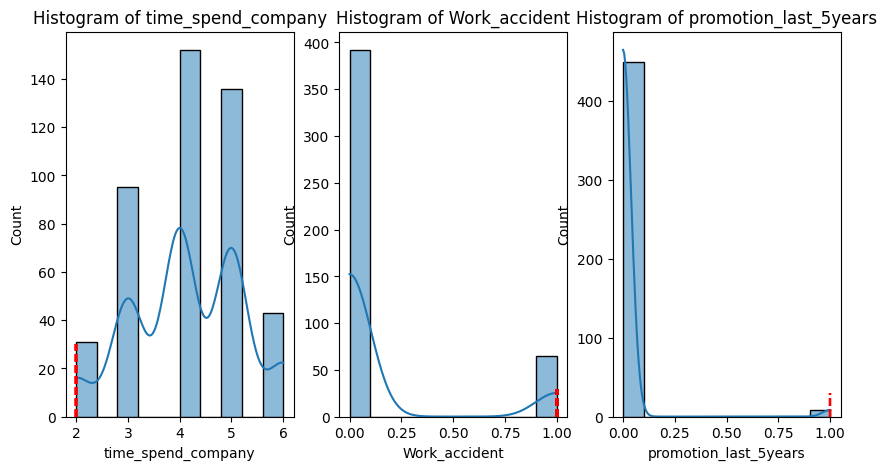

In [23]:
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=3)
axes = axes.flatten()
fig.set_size_inches(10, 5)

for ax, col in zip(axes, continuous_vars):
    mean = processed_df[col].mean()
    std = processed_df[col].std()
    threshold = 2  # You can adjust this threshold as needed
    
    # Detecting and plotting outliers
    outliers = (processed_df[col] - mean).abs() > std * threshold
    sns.histplot(processed_df[col], ax=ax, kde=True)
    ax.set_title(f'Histogram of {col}')
    
    # Adding a line for detected outliers
    ax.vlines(x=processed_df[col][outliers], ymin=0, ymax=30, color='red', linestyle='--')

plt.show()


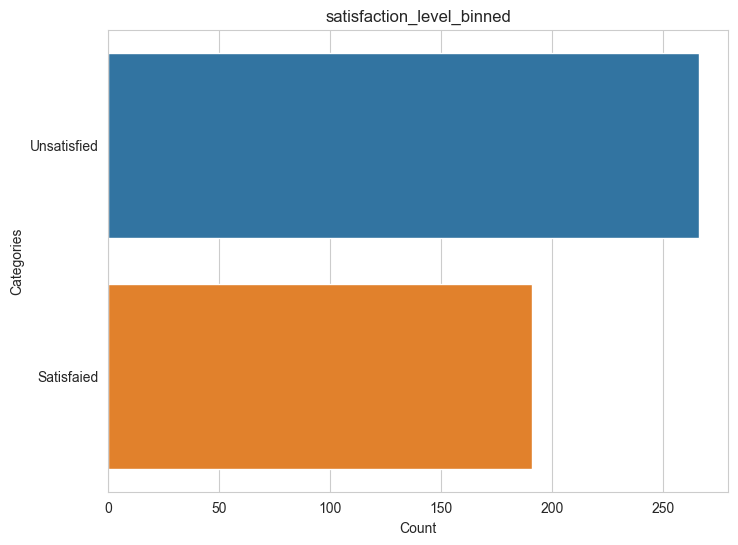

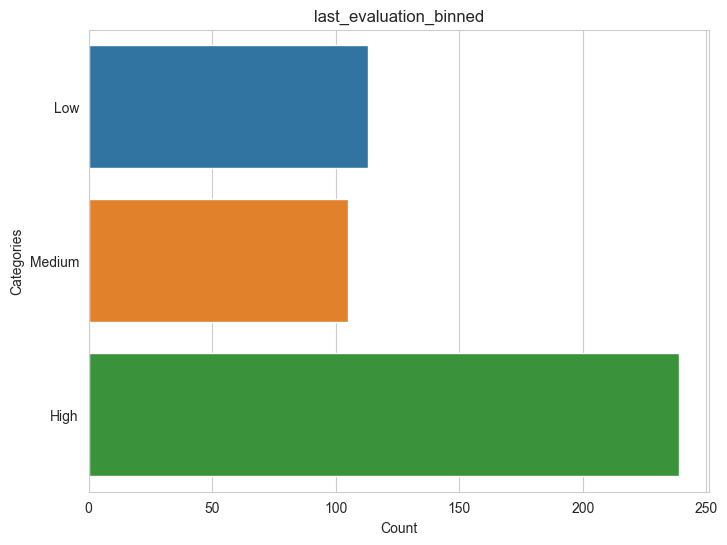

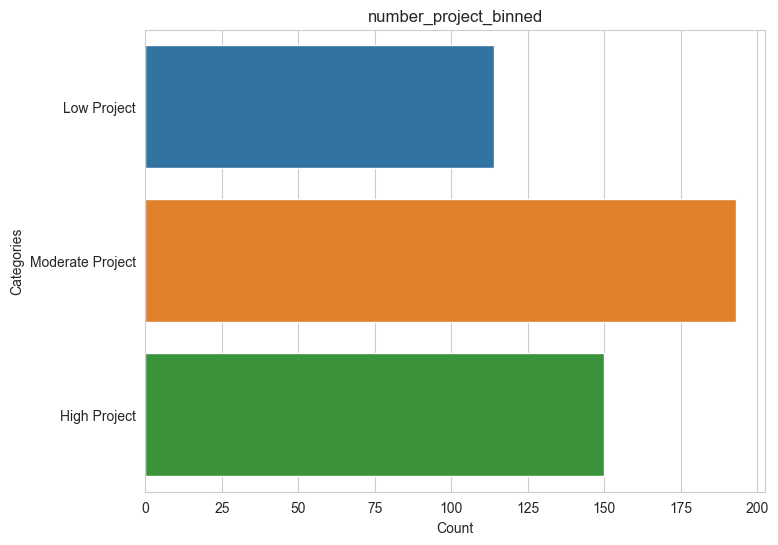

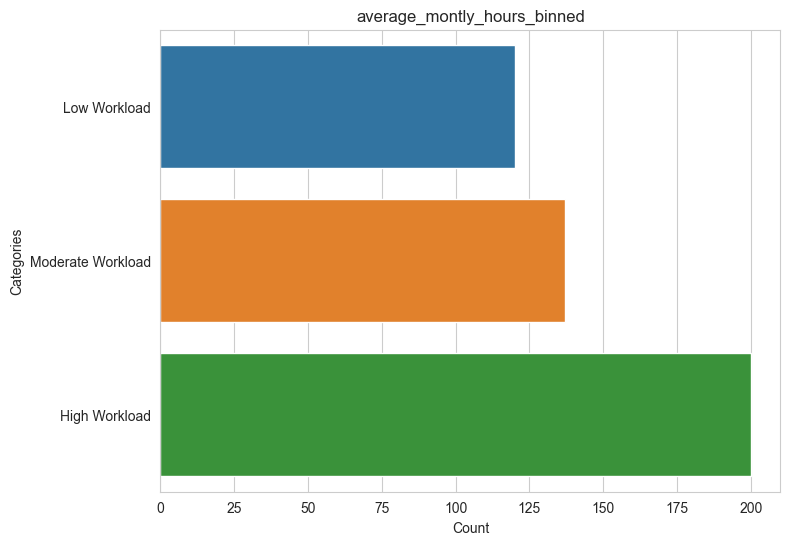

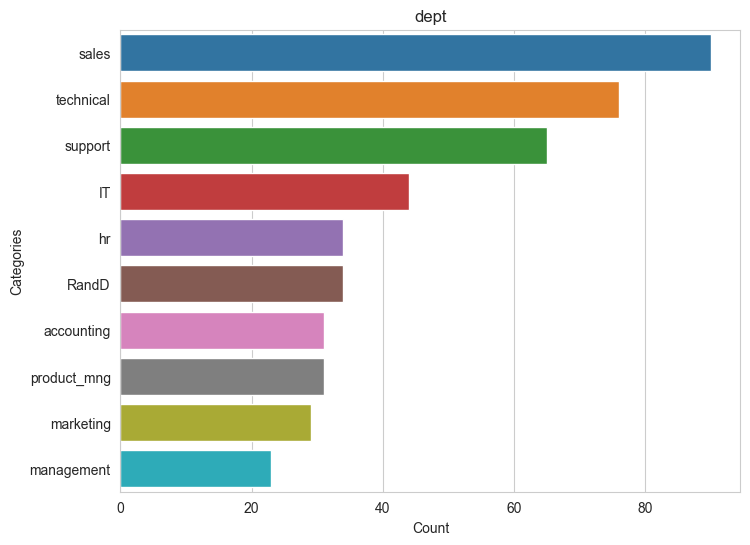

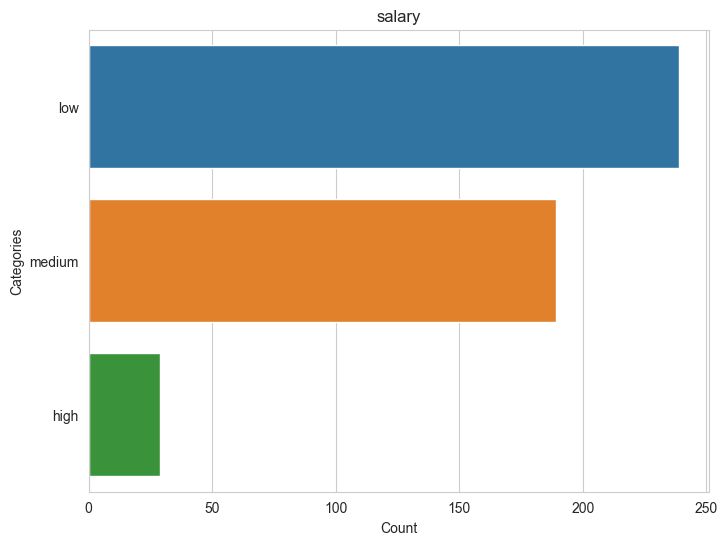

In [24]:
for col in categorical_vars:

    sizes = processed_df[col].value_counts()

    # Create subplots
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.set_style("whitegrid")  # Optional: Set a background style
    sns.barplot(x=sizes.values, y=sizes.index, orient='h')  # Horizontal bar chart

    # Customize subplot
    plt.xlabel('Count')
    plt.ylabel('Categories')
    plt.title(col)

    # Show subplot
    plt.show()

### Bivariate Analysis

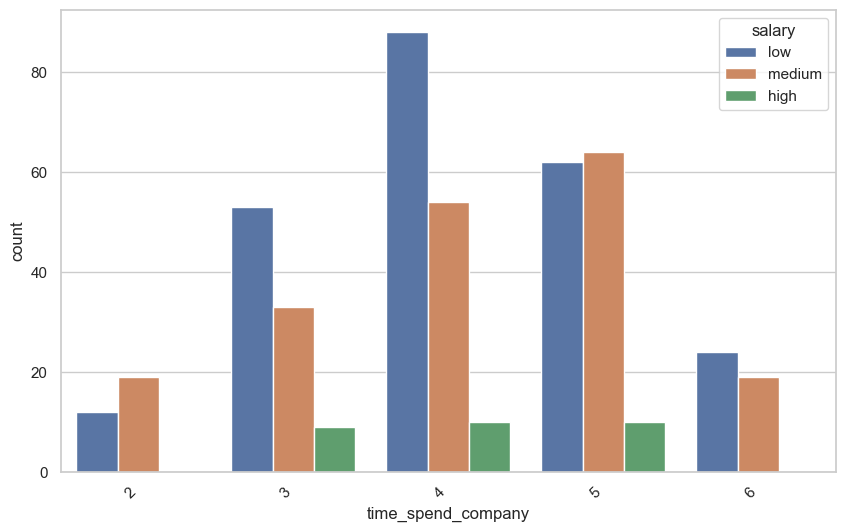

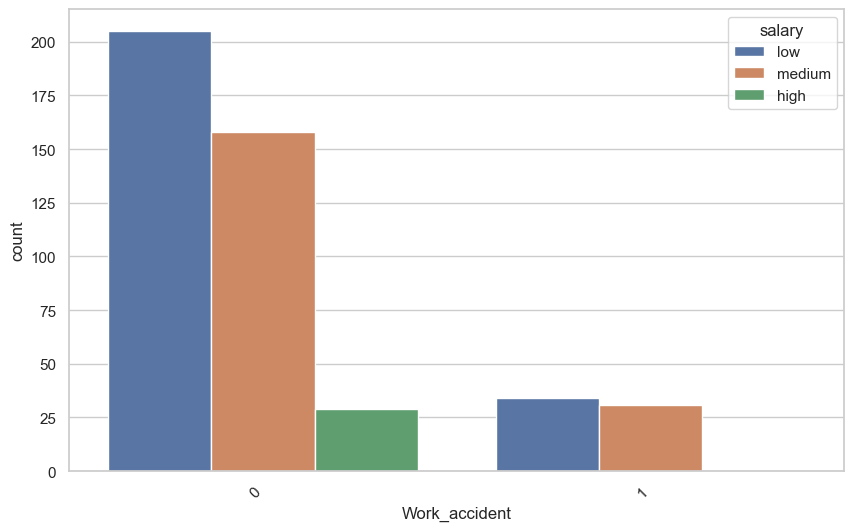

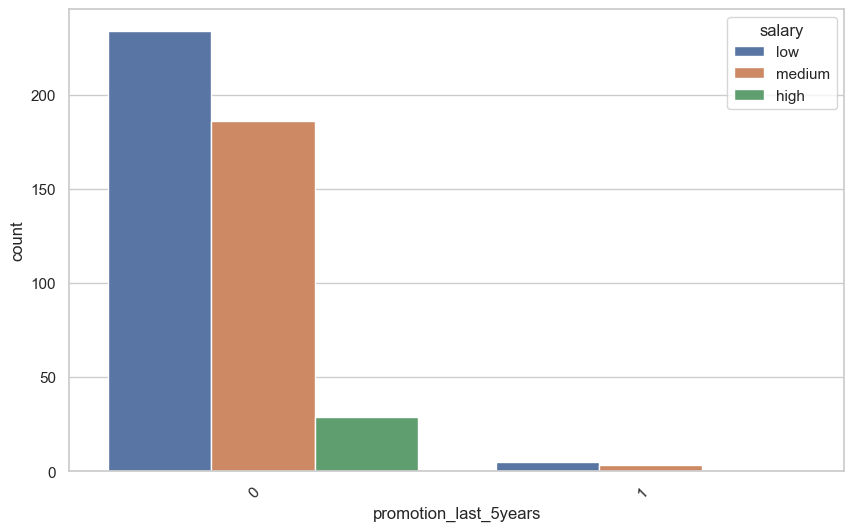

In [25]:
for col in continuous_vars:  

    sns.set(style="whitegrid")  # Optional: Set a grid style if desired

    #  Create the countplot with x-label rotation
    plt.figure(figsize=(10, 6))  # Optional: Set the figure size
    ax = sns.countplot(x= col, hue='salary', data=processed_df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-labels

    plt.show()

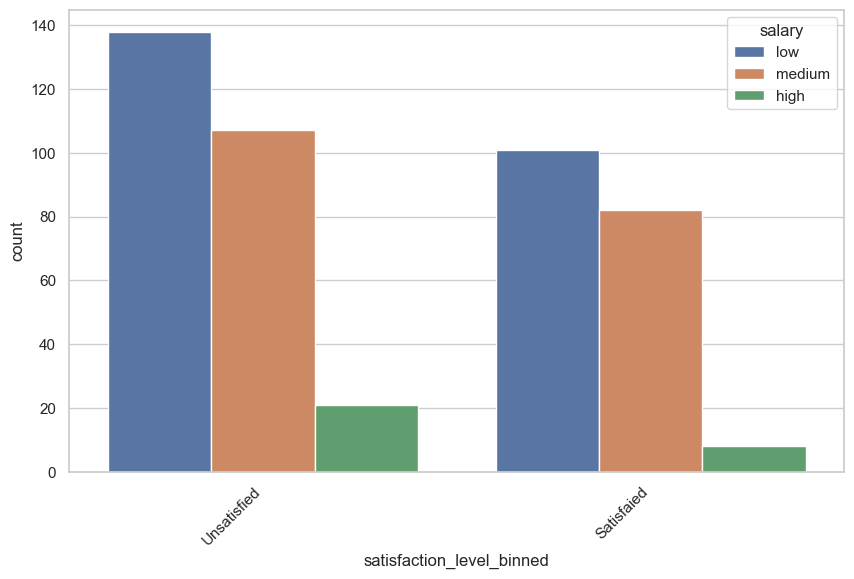

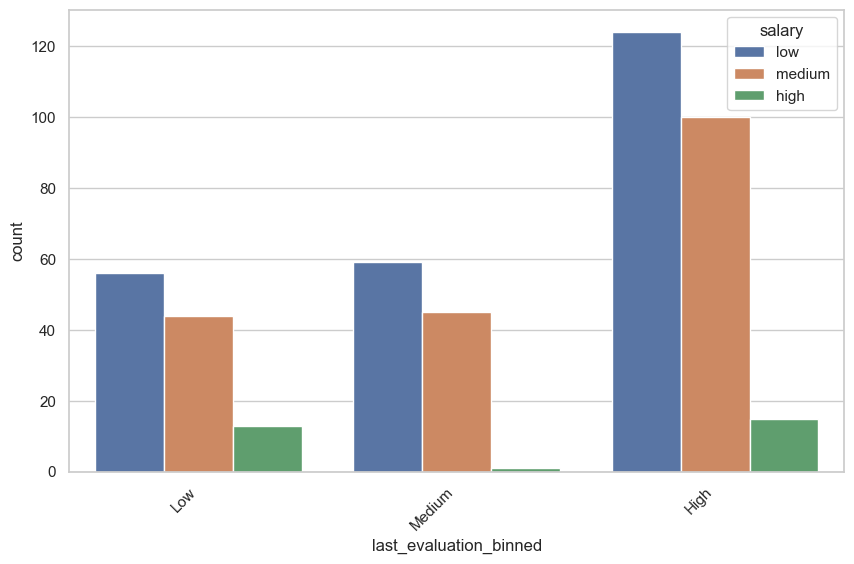

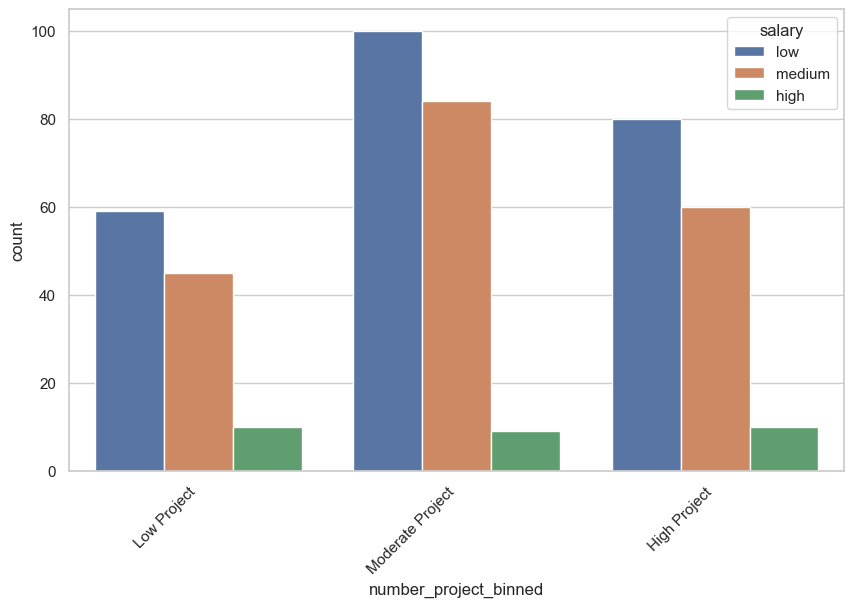

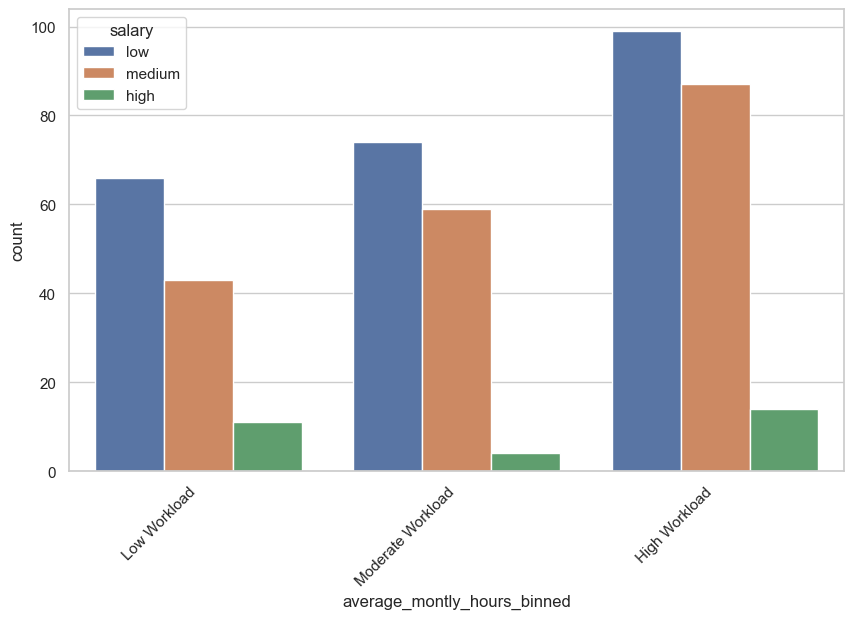

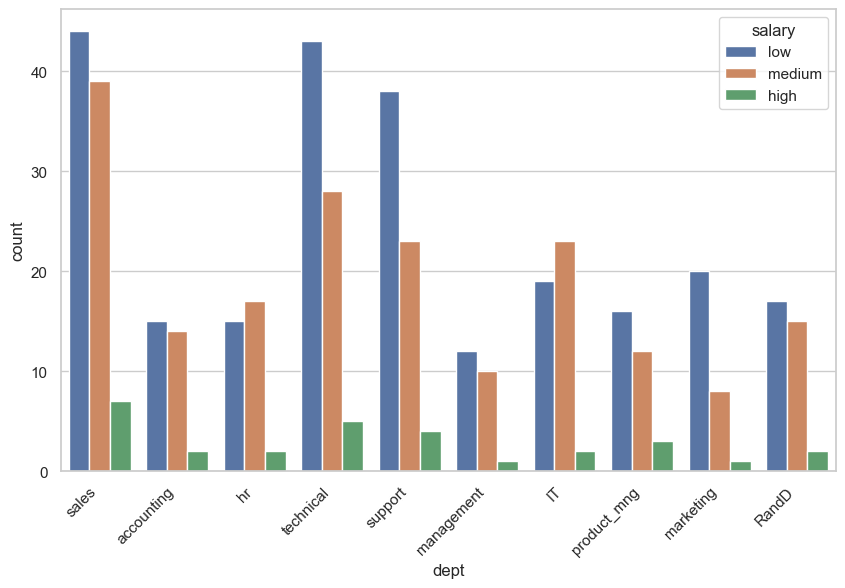

In [26]:
for col in categorical_vars:
    if col != 'salary':
        sns.set(style="whitegrid")  # Optional: Set a grid style if desired

        #  Create the countplot with x-label rotation
        plt.figure(figsize=(10, 6))  # Optional: Set the figure size
        ax = sns.countplot(x= col, hue='salary', data=processed_df)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-labels

        plt.show()

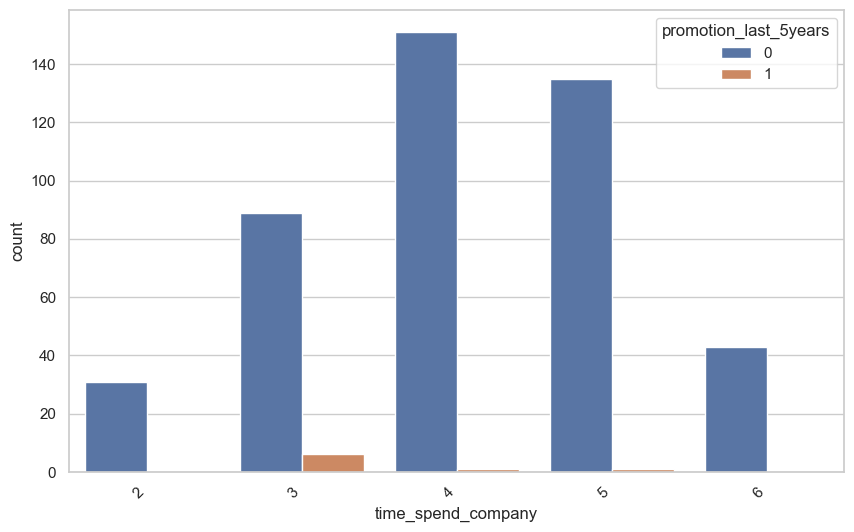

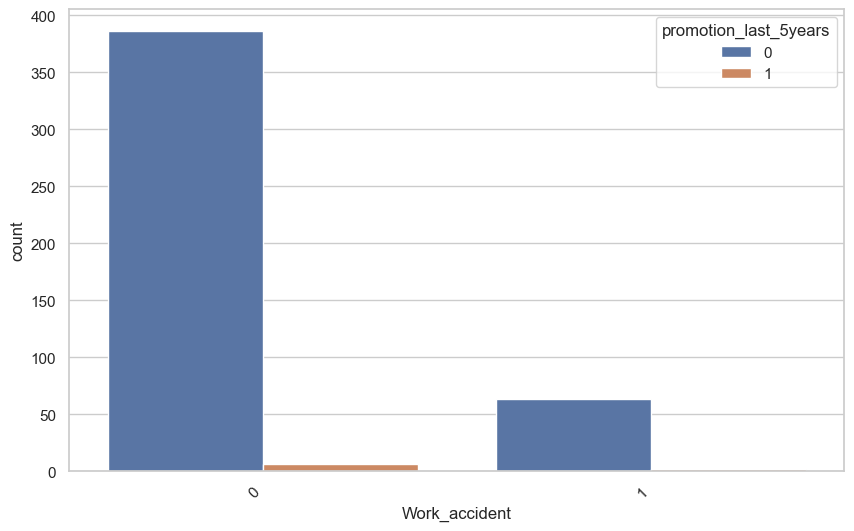

In [27]:
for col in continuous_vars:  
    if col != "promotion_last_5years":

        sns.set(style="whitegrid")  # Optional: Set a grid style if desired

        #  Create the countplot with x-label rotation
        plt.figure(figsize=(10, 6))  # Optional: Set the figure size
        ax = sns.countplot(x= col, hue='promotion_last_5years', data=processed_df)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-labels

        plt.show()

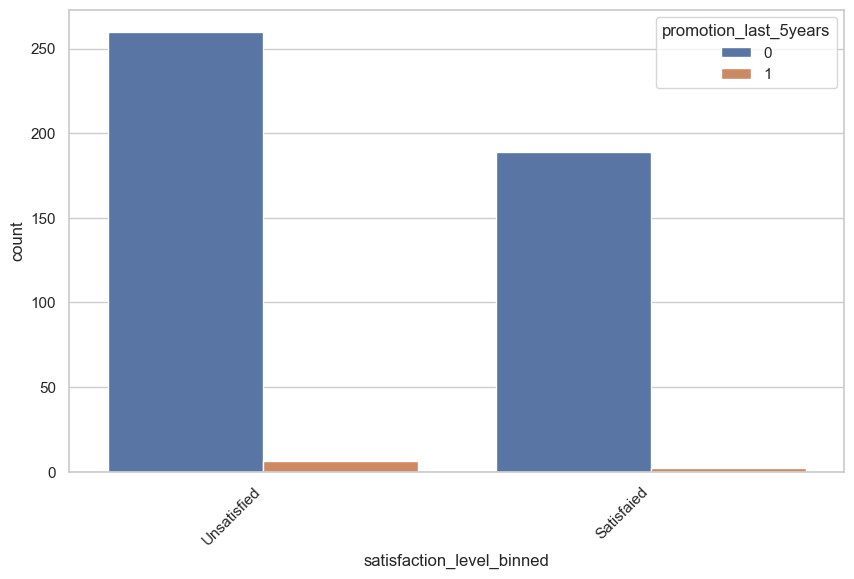

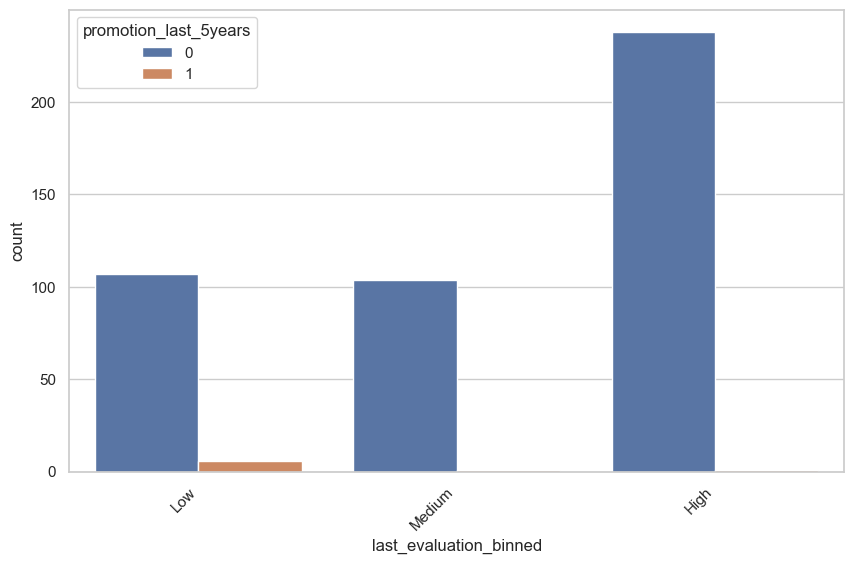

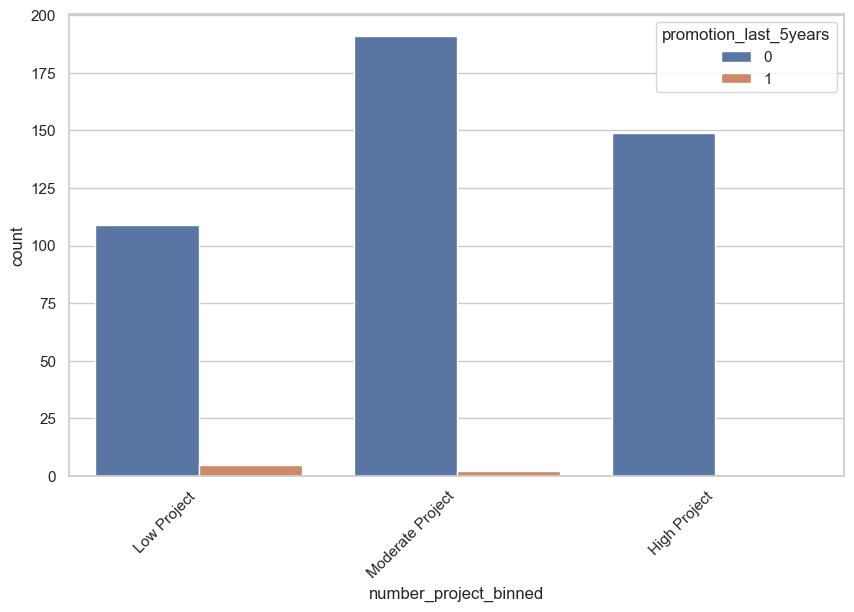

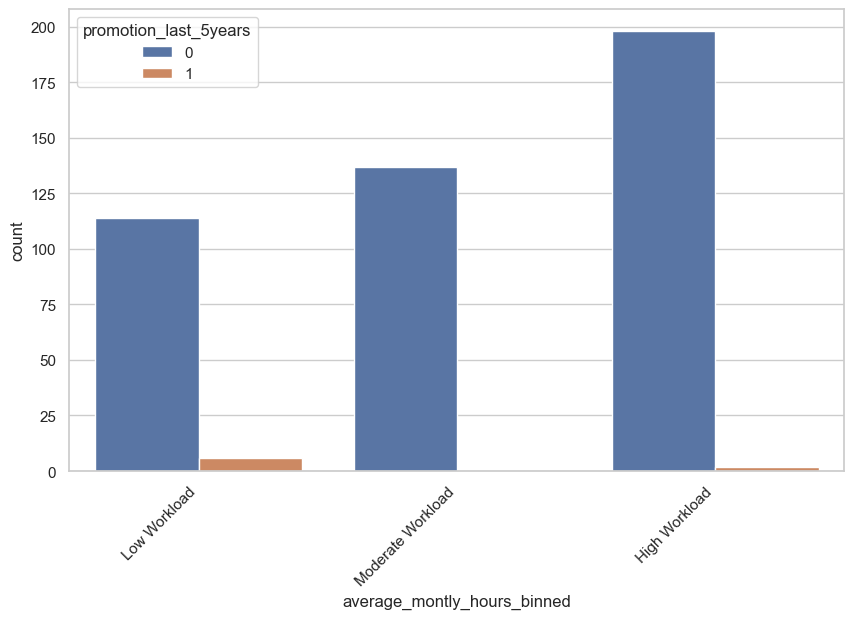

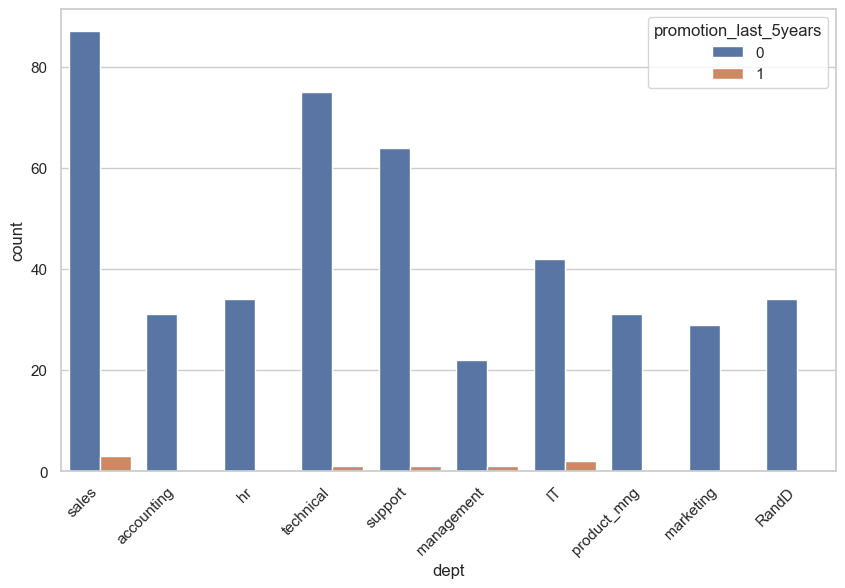

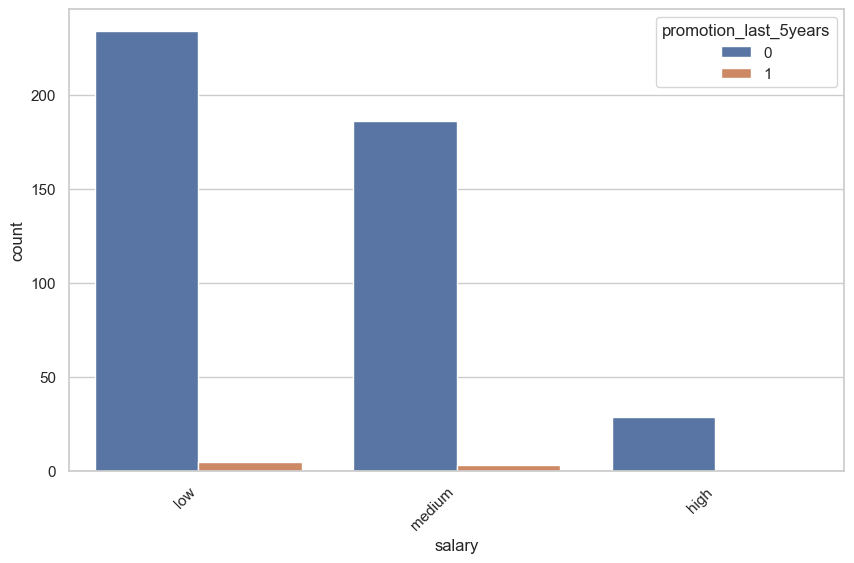

In [28]:
for col in categorical_vars:
    if col != 'promotion_last_5years':
        sns.set(style="whitegrid")  # Optional: Set a grid style if desired

        #  Create the countplot with x-label rotation
        plt.figure(figsize=(10, 6))  # Optional: Set the figure size
        ax = sns.countplot(x= col, hue='promotion_last_5years', data=processed_df)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-labels

        plt.show()

In [29]:
processed_df

,satisfaction_level_binned,last_evaluation_binned,number_project_binned,average_montly_hours_binned,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,Unsatisfied,Low,Low Project,Low Workload,3,0,0,sales,low
1,Satisfaied,High,Moderate Project,High Workload,6,0,0,sales,medium
2,Unsatisfied,High,High Project,High Workload,4,0,0,sales,medium
3,Satisfaied,High,Moderate Project,Moderate Workload,5,0,0,sales,low
6,Unsatisfied,Medium,High Project,Moderate Workload,4,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
1971,Unsatisfied,Low,Low Project,Low Workload,3,1,0,IT,medium
1982,Unsatisfied,Medium,High Project,Moderate Workload,4,0,0,RandD,medium
1988,Satisfaied,Low,High Project,Moderate Workload,5,0,0,technical,medium
1989,Satisfaied,High,Moderate Project,Moderate Workload,4,0,0,management,low


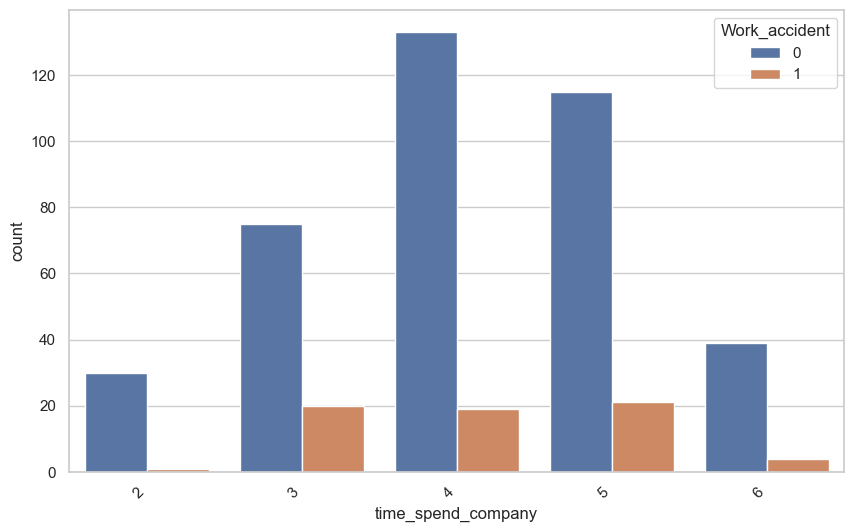

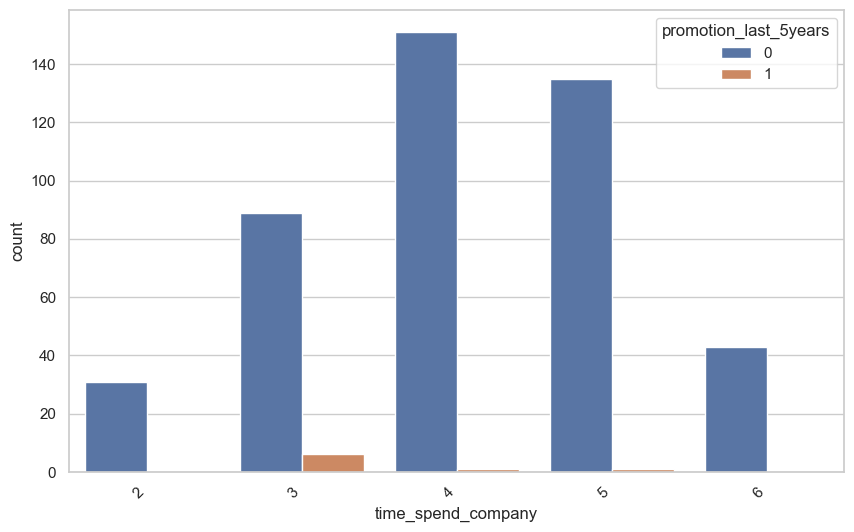

In [30]:
for col in continuous_vars:  
    if col != 'time_spend_company':
        sns.set(style="whitegrid")  # Optional: Set a grid style if desired

        #  Create the countplot with x-label rotation
        plt.figure(figsize=(10, 6))  # Optional: Set the figure size
        ax = sns.countplot(x= 'time_spend_company', hue= col, data=processed_df)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-labels

        plt.show()

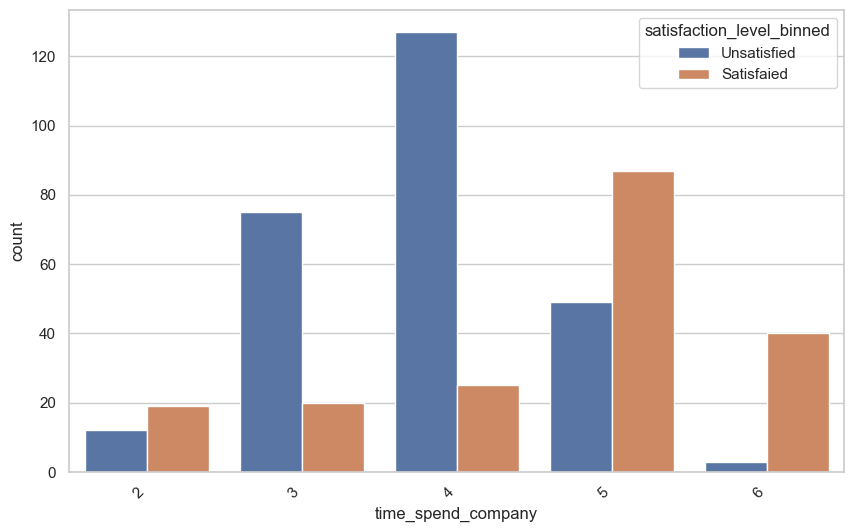

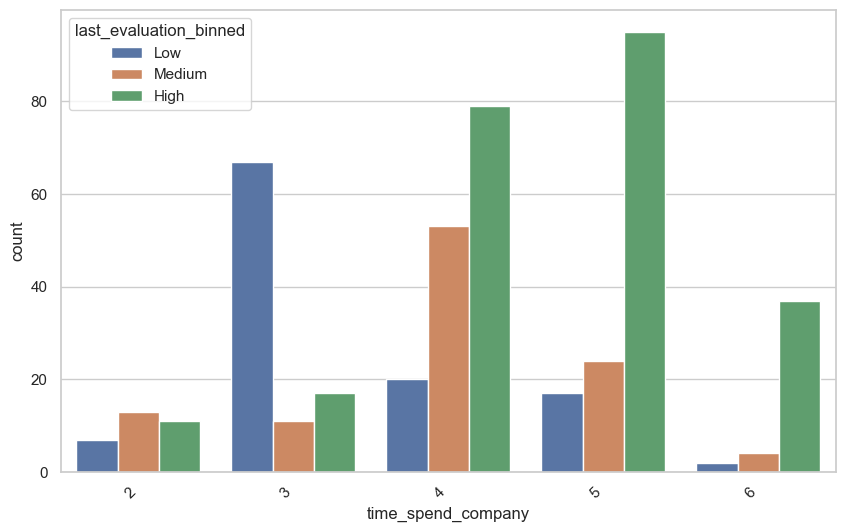

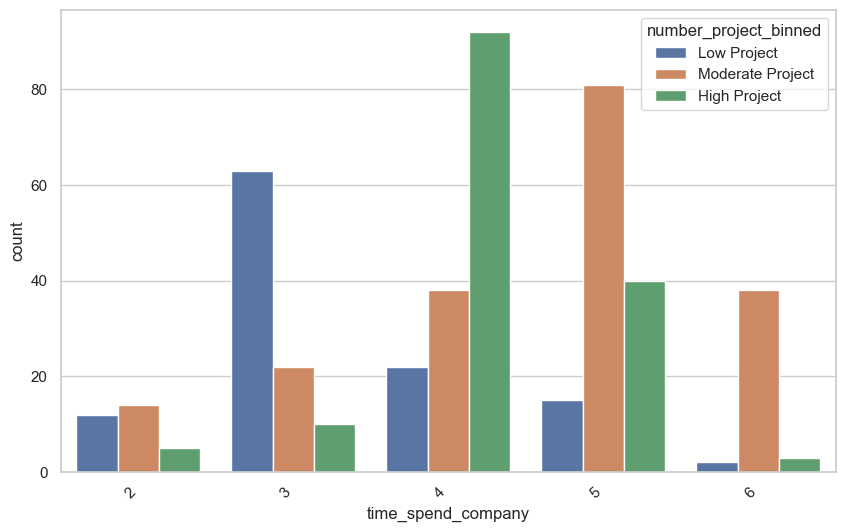

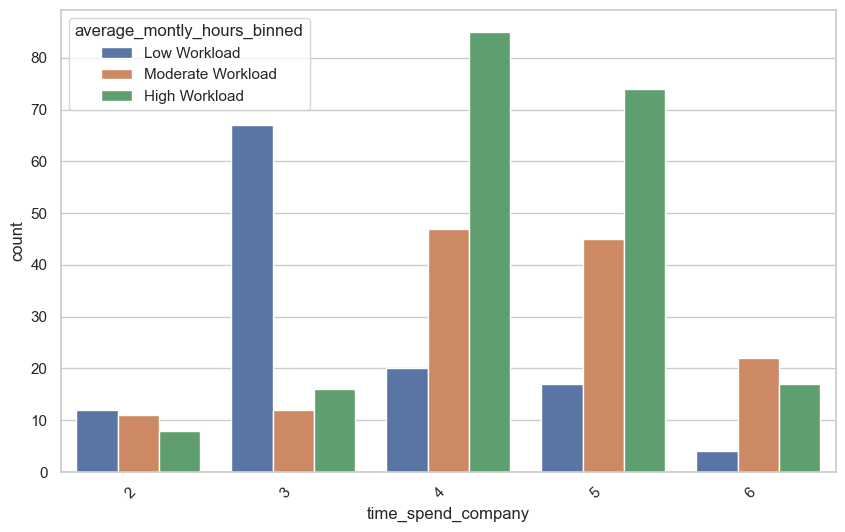

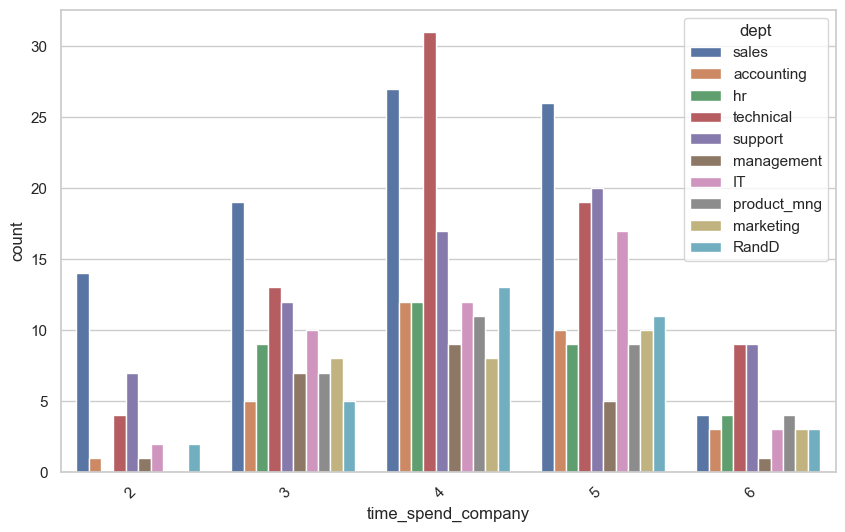

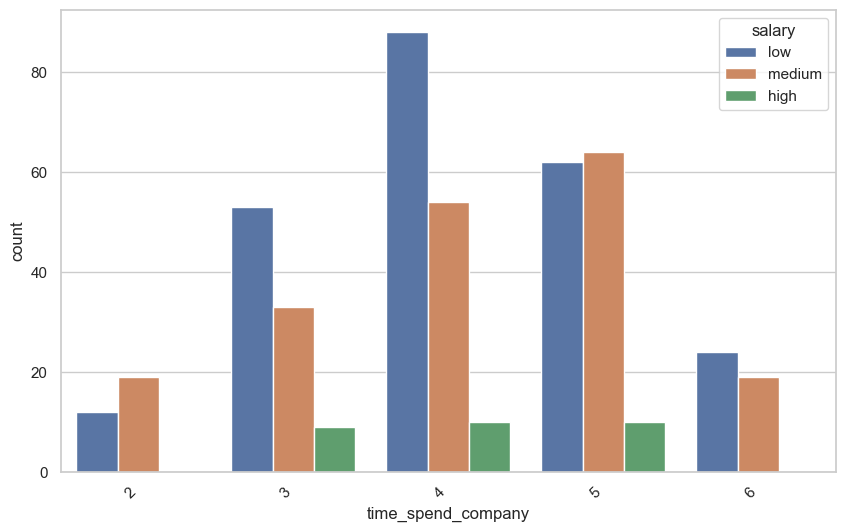

In [31]:
for col in categorical_vars:
    if col != 'time_spend_company':
        sns.set(style="whitegrid")  # Optional: Set a grid style if desired

        #  Create the countplot with x-label rotation
        plt.figure(figsize=(10, 6))  # Optional: Set the figure size
        ax = sns.countplot(x= 'time_spend_company', hue= col, data=processed_df)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-labels

        plt.show()

## Inference
### Conditon an employee to leave

1. if no promotion or time spend in the company is 3year 
2. if an employee received a promotion but had a low evaluation.
3. If an employee received a promotion but had a low average monthly hour count.
4. If an employee's satisfaction level is high but their tenure in the company is less than three years or greater than four years.


# Designing a rule-based approach 

In [32]:
# Developing a rule-based methodology for making predictions or classifications by utilizing predefined criteria derived from the inferences.

remark = []

for index, row in processed_df.iterrows():
    # Condition 1: if no promotion or time spent in the company is 3 years
    condition1 = ((row['promotion_last_5years'] == 0) or (row['time_spend_company'] == 3))

    # Condition 2: if an employee received a promotion but had a low evaluation
    condition2 = ((row['promotion_last_5years'] != 0) and (row['last_evaluation_binned'] == 'low'))

    # Condition 3: if an employee received a promotion but had a low average monthly hour count
    condition3 = ((row['promotion_last_5years'] != 0) and (row['average_montly_hours_binned'] == 'low'))

    # Condition 4: If an employee's satisfaction level is high but their tenure in the company is less than three years or greater than four years
    condition4 = ((row['satisfaction_level_binned'] == 'high') and ((row['time_spend_company'] < 3) or (row['time_spend_company'] > 4)))

    
    if any([condition1, condition2, condition3, condition4]):  # Set to 1 if any condition is met
        remark.append(1)
    else:
        remark.append(0)


In [33]:
#Adding another column to the data set
processed_df["Remark"]= remark

C:\Users\INTELLECT\AppData\Local\Temp\ipykernel_16188\3751000367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df["Remark"]= remark


In [34]:
# Validating the accuracy of the inferences through cross-checking.

processed_df

,satisfaction_level_binned,last_evaluation_binned,number_project_binned,average_montly_hours_binned,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Remark
0,Unsatisfied,Low,Low Project,Low Workload,3,0,0,sales,low,1
1,Satisfaied,High,Moderate Project,High Workload,6,0,0,sales,medium,1
2,Unsatisfied,High,High Project,High Workload,4,0,0,sales,medium,1
3,Satisfaied,High,Moderate Project,Moderate Workload,5,0,0,sales,low,1
6,Unsatisfied,Medium,High Project,Moderate Workload,4,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
1971,Unsatisfied,Low,Low Project,Low Workload,3,1,0,IT,medium,1
1982,Unsatisfied,Medium,High Project,Moderate Workload,4,0,0,RandD,medium,1
1988,Satisfaied,Low,High Project,Moderate Workload,5,0,0,technical,medium,1
1989,Satisfaied,High,Moderate Project,Moderate Workload,4,0,0,management,low,1


In [35]:
# Validating the accuracy of the inferences through cross-checking.

processed_df["Remark"].value_counts()

1    455
0      2
Name: Remark, dtype: int64

# Report on Inference Accuracy Validation:

### The accuracy of the inferences made in the analysis was cross-checked using the processed dataset, which exclusively included data from employees who have left the company. The resulting distribution of the "Remark" variable is as follows:

###  Category 1: This category indicates that an employee is likely to leave the company. It was found to have a count of 455 employees.
### Category 0: This category indicates that an employee is not likely to leave the company. It was found to have a count of 2 employees.

### These findings suggest that the majority of employees in the dataset, consisting of those who have left the company, are indeed classified as likely to leave according to the inferred criteria (Category 1). However, it's important to note that the small count in Category 0 indicates that very few employees were classified as not likely to leave based on the same criteria.

### This validation process underscores the potential accuracy of the inferences made through the rule-based approach and their applicability to employees who have left the company.

# Data of the existing employees in the company  

In [36]:
data2 = pd.read_excel(r"C:\Users\INTELLECT\TakenMind\attrition.xlsx", "Existing employees")

In [37]:
data2

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.45,0.74,4,215,3,0,0,sales,low
1,2002,3.45,0.69,5,208,14,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,NaN
4,2005,0.49,16.00,30,214,2,0,0,technical,low
...,...,...,...,...,...,...,...,...,...,...
11423,13424,0.90,0.55,3,259,10,1,1,management,high
11424,13425,0.74,0.95,5,266,10,0,1,management,high
11425,13426,0.85,0.54,3,185,10,0,1,management,high
11426,13427,0.33,0.65,3,172,10,0,1,marketing,high


In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 11428 non-null  int64  
 1   satisfaction_level     11428 non-null  float64
 2   last_evaluation        11428 non-null  float64
 3   number_project         11428 non-null  int64  
 4   average_montly_hours   11428 non-null  int64  
 5   time_spend_company     11428 non-null  int64  
 6   Work_accident          11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   dept                   11428 non-null  object 
 9   salary                 11427 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB


In [39]:
# Checking for Missing Value
round((data2.isnull().sum() * 100/ len(data2)),2).sort_values(ascending=False)

salary                   0.01
Emp ID                   0.00
satisfaction_level       0.00
last_evaluation          0.00
number_project           0.00
average_montly_hours     0.00
time_spend_company       0.00
Work_accident            0.00
promotion_last_5years    0.00
dept                     0.00
dtype: float64

In [40]:
# Removing the nan value
data2.dropna(inplace=True)

In [41]:
# Checking for Missing Value
round((data2.isnull().sum() * 100/ len(data2)),2).sort_values(ascending=False)

Emp ID                   0.0
satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
promotion_last_5years    0.0
dept                     0.0
salary                   0.0
dtype: float64

In [42]:
data2

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.45,0.74,4,215,3,0,0,sales,low
1,2002,3.45,0.69,5,208,14,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
4,2005,0.49,16.00,30,214,2,0,0,technical,low
5,2006,0.36,0.95,3,206,4,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11423,13424,0.90,0.55,3,259,10,1,1,management,high
11424,13425,0.74,0.95,5,266,10,0,1,management,high
11425,13426,0.85,0.54,3,185,10,0,1,management,high
11426,13427,0.33,0.65,3,172,10,0,1,marketing,high


In [43]:
data2 = data2.drop("Emp ID", axis=1)

In [44]:

bins2 = np.linspace(min(data2["satisfaction_level"]),max(data2["satisfaction_level"]),3)
group_names = ["Unsatisfied","Satisfaied"]

data2["satisfaction_level_binned"] = pd.cut(data2["satisfaction_level"], bins2, labels=group_names, include_lowest=True)

In [45]:
bins2 = np.linspace(min(data2["average_montly_hours"]),max(data2["average_montly_hours"]),4)
group_names = ["Low Workload", "Moderate Workload", "High Workload"]

data2["average_montly_hours_binned"] = pd.cut(data2["average_montly_hours"], bins2, labels=group_names, include_lowest=True)


In [46]:
bins2 = np.linspace(min(data2["number_project"]),max(data2["number_project"]),4)
group_names = ["Low Project", "Moderate Project", "High Project"]

data2["number_project_binned"] = pd.cut(data2["number_project"], bins2, labels=group_names, include_lowest=True)



In [47]:

bins2 = np.linspace(min(data2["last_evaluation"]),max(data2["last_evaluation"]),4)
group_names = ["Low", "Medium", "High"]

data2["last_evaluation_binned"] = pd.cut(data2["last_evaluation"], bins2, labels=group_names, include_lowest=True)

In [48]:
data2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,satisfaction_level_binned,average_montly_hours_binned,number_project_binned,last_evaluation_binned
0,0.45,0.74,4,215,3,0,0,sales,low,Unsatisfied,Low Workload,Low Project,Low
1,3.45,0.69,5,208,14,0,0,sales,low,Unsatisfied,Low Workload,Low Project,Low
2,0.45,0.69,5,193,3,0,0,sales,low,Unsatisfied,Low Workload,Low Project,Low
4,0.49,16.00,30,214,2,0,0,technical,low,Unsatisfied,Low Workload,High Project,High
5,0.36,0.95,3,206,4,0,0,sales,low,Unsatisfied,Low Workload,Low Project,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11423,0.90,0.55,3,259,10,1,1,management,high,Unsatisfied,Low Workload,Low Project,Low
11424,0.74,0.95,5,266,10,0,1,management,high,Unsatisfied,Low Workload,Low Project,Low
11425,0.85,0.54,3,185,10,0,1,management,high,Unsatisfied,Low Workload,Low Project,Low
11426,0.33,0.65,3,172,10,0,1,marketing,high,Unsatisfied,Low Workload,Low Project,Low


In [49]:
extract2 = [
    
    "satisfaction_level_binned", 
    "last_evaluation_binned", 
    "number_project_binned", 
    "average_montly_hours_binned", 
    "time_spend_company", 
    "Work_accident", 
    "promotion_last_5years", 
    "dept", "salary"

]

In [50]:
df2  = data2[extract2]

In [51]:
df2

,satisfaction_level_binned,last_evaluation_binned,number_project_binned,average_montly_hours_binned,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,Unsatisfied,Low,Low Project,Low Workload,3,0,0,sales,low
1,Unsatisfied,Low,Low Project,Low Workload,14,0,0,sales,low
2,Unsatisfied,Low,Low Project,Low Workload,3,0,0,sales,low
4,Unsatisfied,High,High Project,Low Workload,2,0,0,technical,low
5,Unsatisfied,Low,Low Project,Low Workload,4,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
11423,Unsatisfied,Low,Low Project,Low Workload,10,1,1,management,high
11424,Unsatisfied,Low,Low Project,Low Workload,10,0,1,management,high
11425,Unsatisfied,Low,Low Project,Low Workload,10,0,1,management,high
11426,Unsatisfied,Low,Low Project,Low Workload,10,0,1,marketing,high


### Exporatory Data Analysis of Existing Employee Data

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11427 entries, 0 to 11427
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   satisfaction_level_binned    11427 non-null  category
 1   last_evaluation_binned       11427 non-null  category
 2   number_project_binned        11427 non-null  category
 3   average_montly_hours_binned  11427 non-null  category
 4   time_spend_company           11427 non-null  int64   
 5   Work_accident                11427 non-null  int64   
 6   promotion_last_5years        11427 non-null  int64   
 7   dept                         11427 non-null  object  
 8   salary                       11427 non-null  object  
dtypes: category(4), int64(3), object(2)
memory usage: 580.8+ KB


In [53]:
df2.describe()

,time_spend_company,Work_accident,promotion_last_5years
count,11427.000000,11427.000000,11427.000000
mean,3.381202,0.175024,0.026516
std,1.565521,0.380004,0.161215
min,2.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000
max,14.000000,1.000000,2.000000


In [54]:
# Checking for Missing Value
round((df2.isnull().sum() * 100/ len(df2)),2).sort_values(ascending=False)

satisfaction_level_binned      0.0
last_evaluation_binned         0.0
number_project_binned          0.0
average_montly_hours_binned    0.0
time_spend_company             0.0
Work_accident                  0.0
promotion_last_5years          0.0
dept                           0.0
salary                         0.0
dtype: float64

In [55]:
# Handling duplicates
print("Duplicates in dataset:", df2.duplicated().sum())

Duplicates in dataset: 10971


In [56]:
processed_df2 = df2.drop_duplicates(keep = 'first')

In [57]:
processed_df2.duplicated().sum()

0

In [58]:
processed_df2

,satisfaction_level_binned,last_evaluation_binned,number_project_binned,average_montly_hours_binned,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,Unsatisfied,Low,Low Project,Low Workload,3,0,0,sales,low
1,Unsatisfied,Low,Low Project,Low Workload,14,0,0,sales,low
4,Unsatisfied,High,High Project,Low Workload,2,0,0,technical,low
5,Unsatisfied,Low,Low Project,Low Workload,4,0,0,sales,low
6,Satisfaied,Low,Low Project,Low Workload,4,0,1,sales,low
...,...,...,...,...,...,...,...,...,...
9970,Unsatisfied,Low,Low Project,Low Workload,6,1,0,marketing,high
9972,Unsatisfied,Low,Low Project,Low Workload,8,0,0,accounting,high
9973,Unsatisfied,Low,Low Project,Low Workload,8,0,0,IT,medium
9995,Unsatisfied,Low,Low Project,Low Workload,10,1,1,management,high


In [59]:
# Seperate numeriacl from categorical features
continuous_vars2=processed_df2.select_dtypes(['float64','int']).columns
print(continuous_vars2)

print(" ")

categorical_vars2=processed_df2.select_dtypes(['object','category']).columns
print(categorical_vars2)

Index(['time_spend_company', 'Work_accident', 'promotion_last_5years'], dtype='object')
 
Index(['satisfaction_level_binned', 'last_evaluation_binned',
       'number_project_binned', 'average_montly_hours_binned', 'dept',
       'salary'],
      dtype='object')


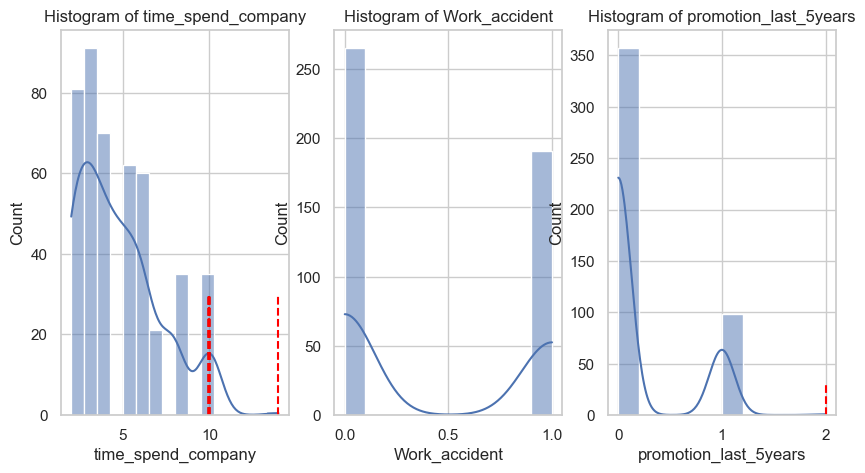

In [60]:
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=3)
axes = axes.flatten()
fig.set_size_inches(10, 5)

for ax, col in zip(axes, continuous_vars2):
    mean = processed_df2[col].mean()
    std = processed_df2[col].std()
    threshold = 2  # You can adjust this threshold as needed
    
    # Detecting and plotting outliers
    outliers = (processed_df2[col] - mean).abs() > std * threshold
    sns.histplot(processed_df2[col], ax=ax, kde=True)
    ax.set_title(f'Histogram of {col}')
    
    # Adding a line for detected outliers
    ax.vlines(x=processed_df2[col][outliers], ymin=0, ymax=30, color='red', linestyle='--')

plt.show()

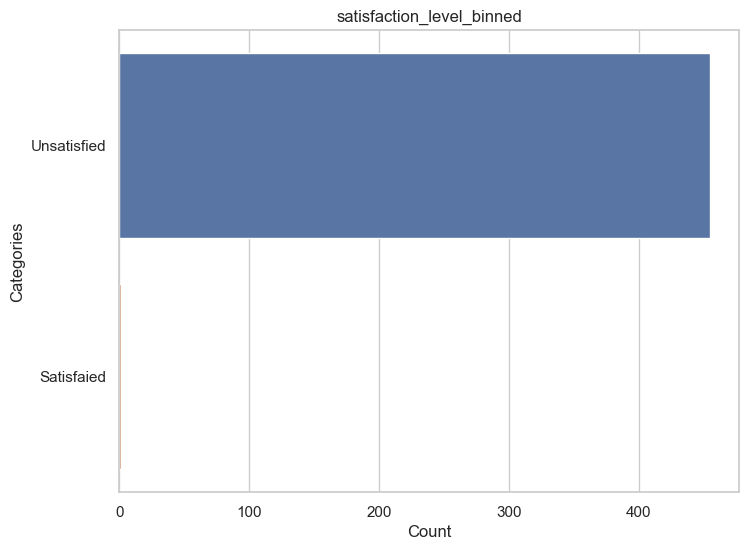

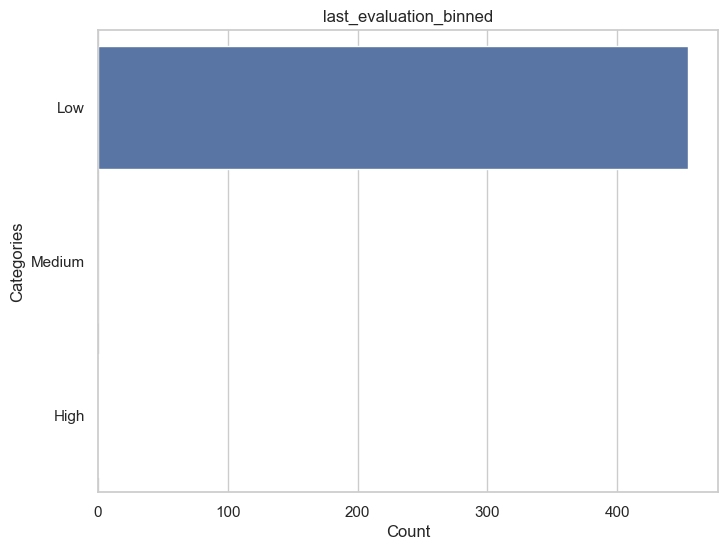

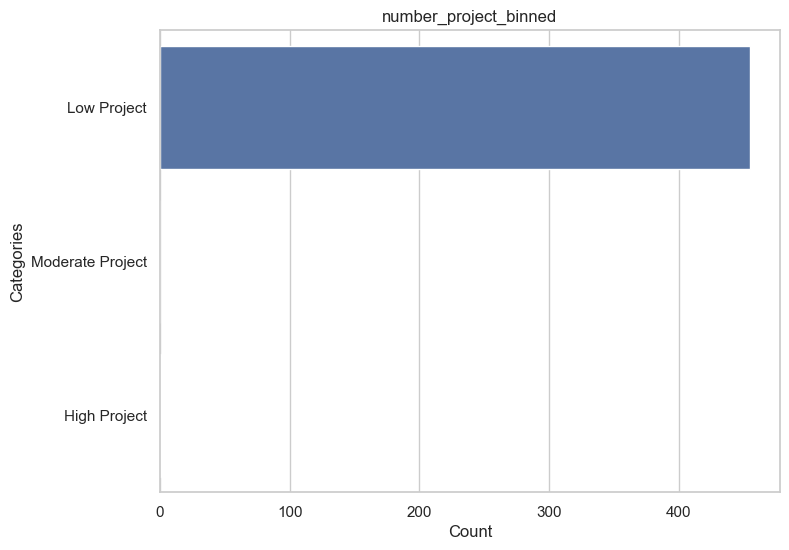

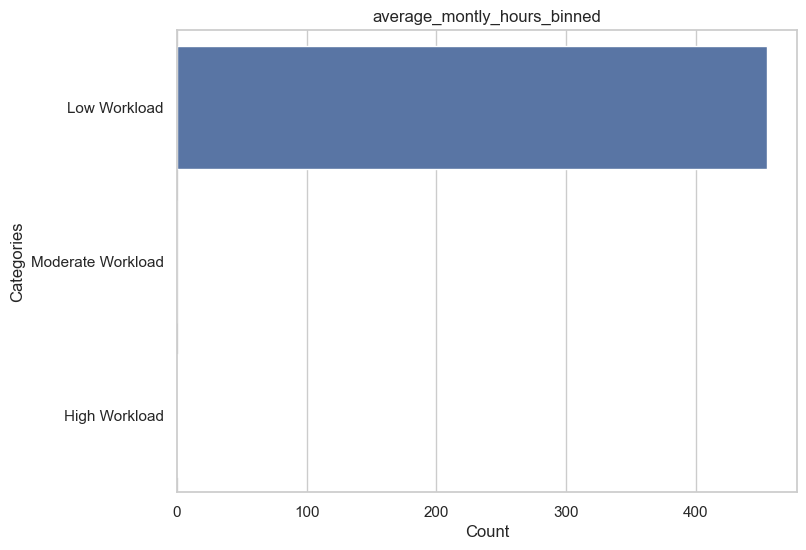

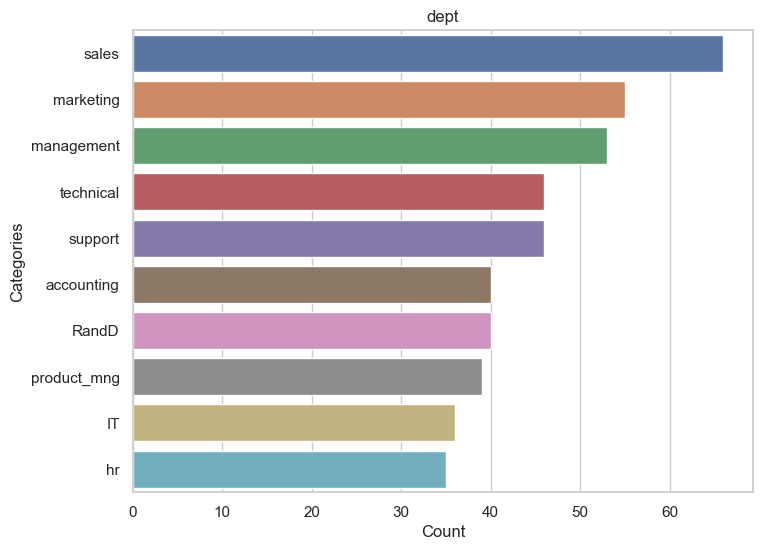

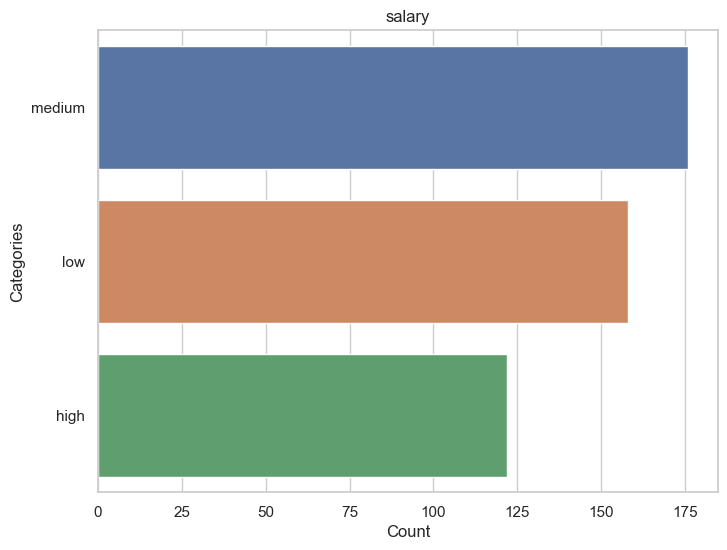

In [61]:
for col in categorical_vars2:
    
    sizes = processed_df2[col].value_counts()

    # Create subplots
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.set_style("whitegrid")  # Optional: Set a background style
    sns.barplot(x=sizes.values, y=sizes.index, orient='h')  # Horizontal bar chart

    # Customize subplot
    plt.xlabel('Count')
    plt.ylabel('Categories')
    plt.title(col)

    # Show subplot
    plt.show()

### Bivariate Analysis for the Existing Employee Data

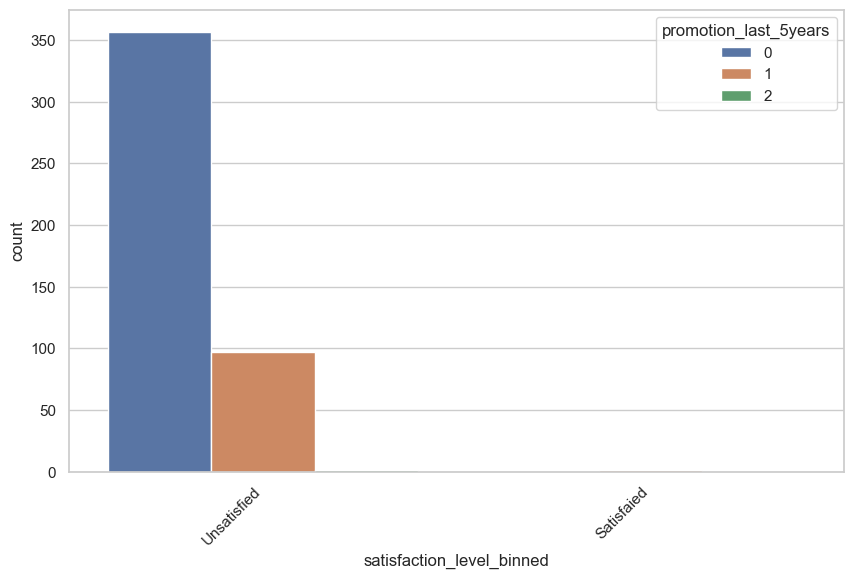

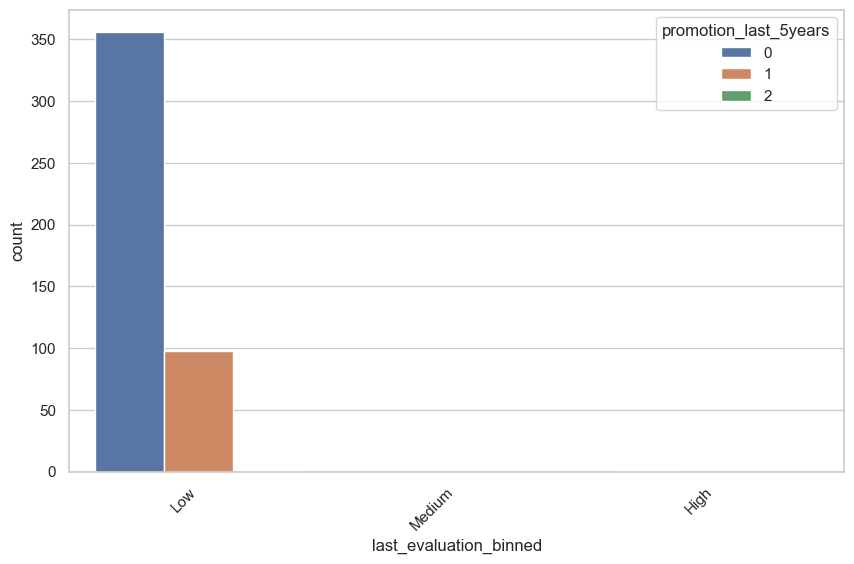

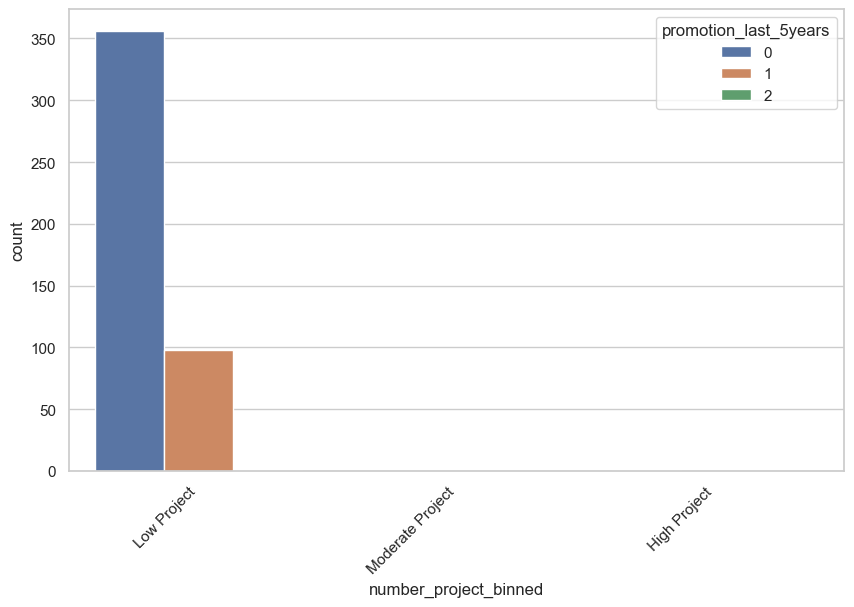

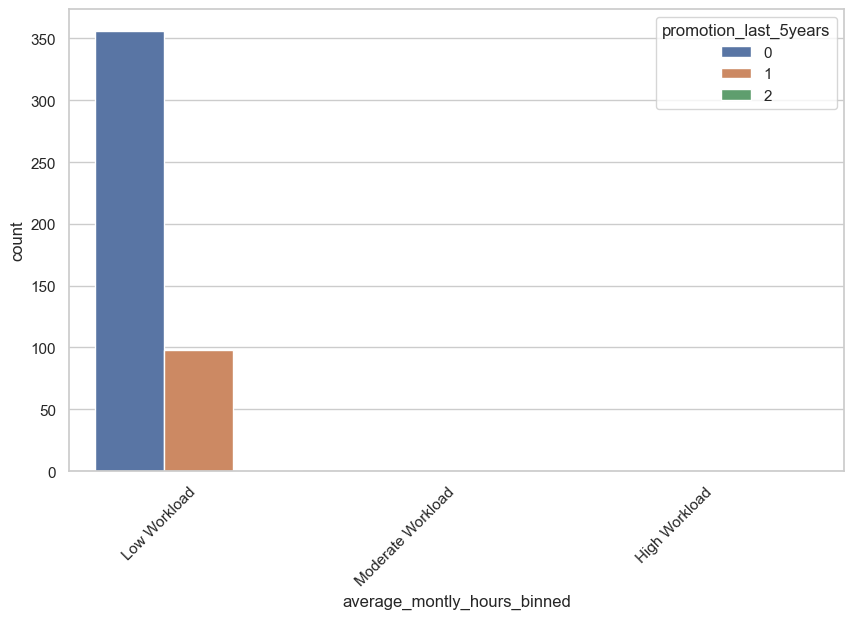

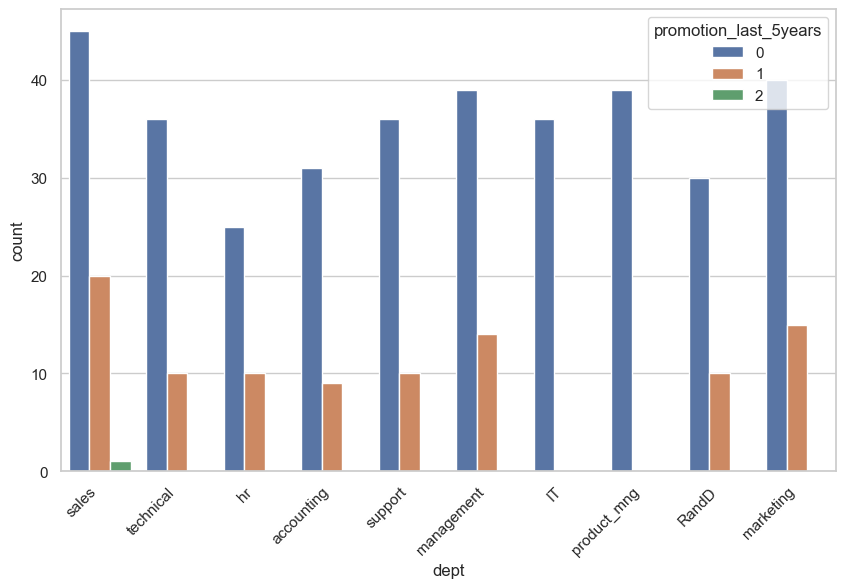

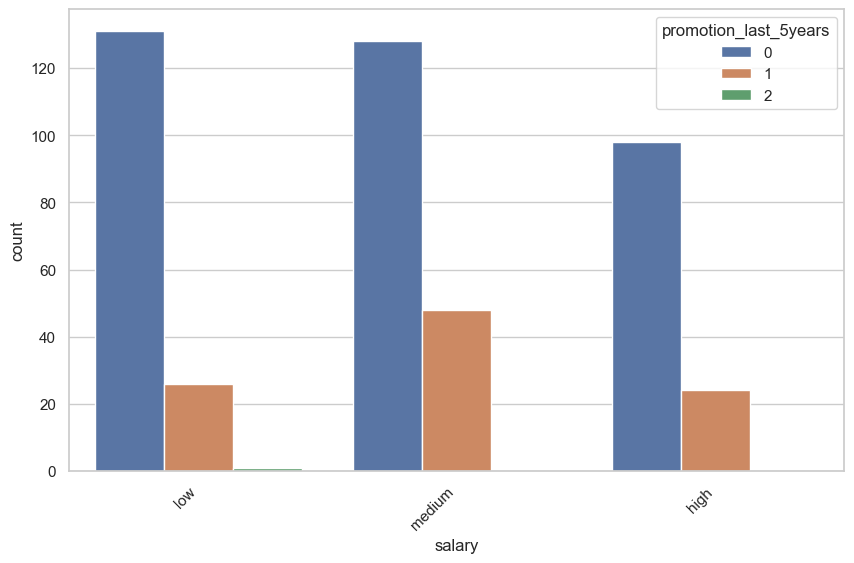

In [62]:
for col in categorical_vars2:
    if col != 'promotion_last_5years':
        sns.set(style="whitegrid")  # Optional: Set a grid style if desired

        #  Create the countplot with x-label rotation
        plt.figure(figsize=(10, 6))  # Optional: Set the figure size
        ax = sns.countplot(x= col, hue='promotion_last_5years', data=processed_df2)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-labels

        plt.show()

In [63]:
processed_df2

,satisfaction_level_binned,last_evaluation_binned,number_project_binned,average_montly_hours_binned,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,Unsatisfied,Low,Low Project,Low Workload,3,0,0,sales,low
1,Unsatisfied,Low,Low Project,Low Workload,14,0,0,sales,low
4,Unsatisfied,High,High Project,Low Workload,2,0,0,technical,low
5,Unsatisfied,Low,Low Project,Low Workload,4,0,0,sales,low
6,Satisfaied,Low,Low Project,Low Workload,4,0,1,sales,low
...,...,...,...,...,...,...,...,...,...
9970,Unsatisfied,Low,Low Project,Low Workload,6,1,0,marketing,high
9972,Unsatisfied,Low,Low Project,Low Workload,8,0,0,accounting,high
9973,Unsatisfied,Low,Low Project,Low Workload,8,0,0,IT,medium
9995,Unsatisfied,Low,Low Project,Low Workload,10,1,1,management,high


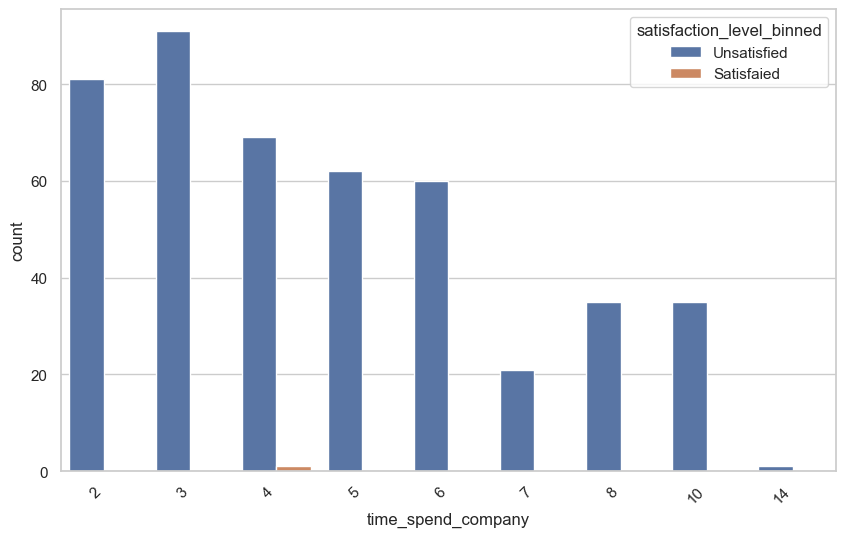

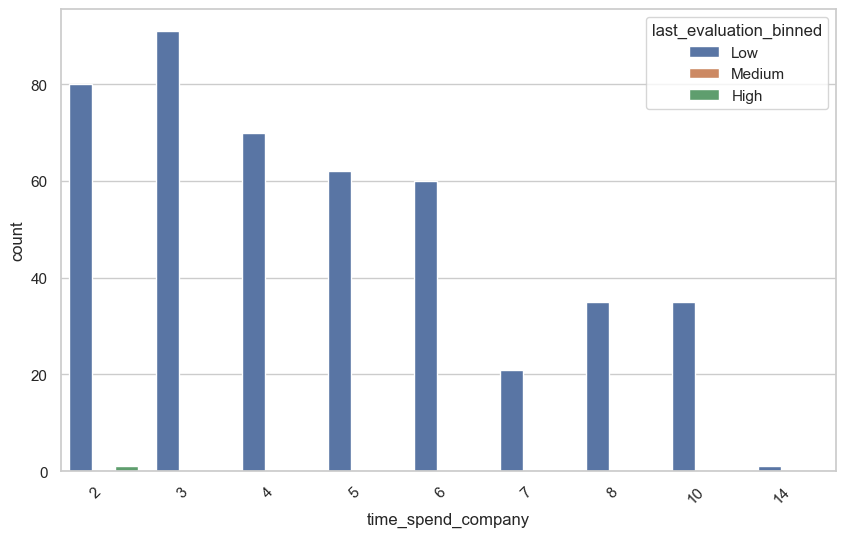

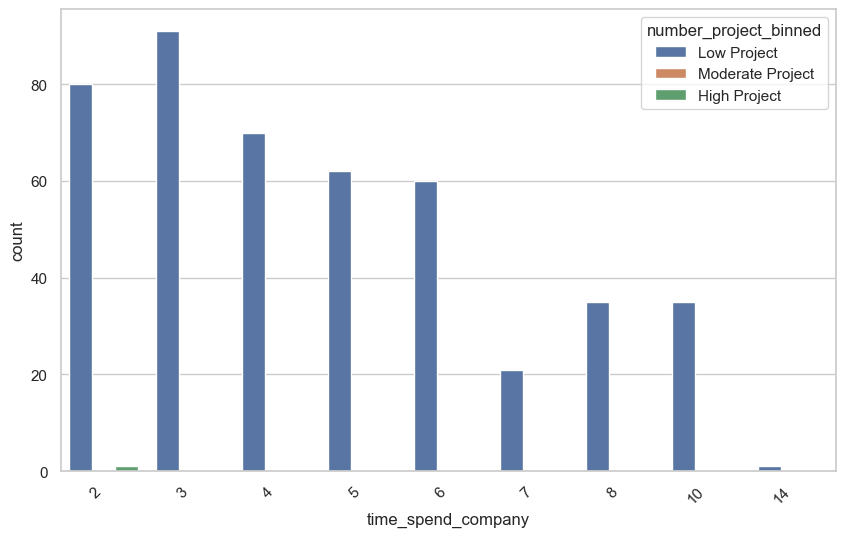

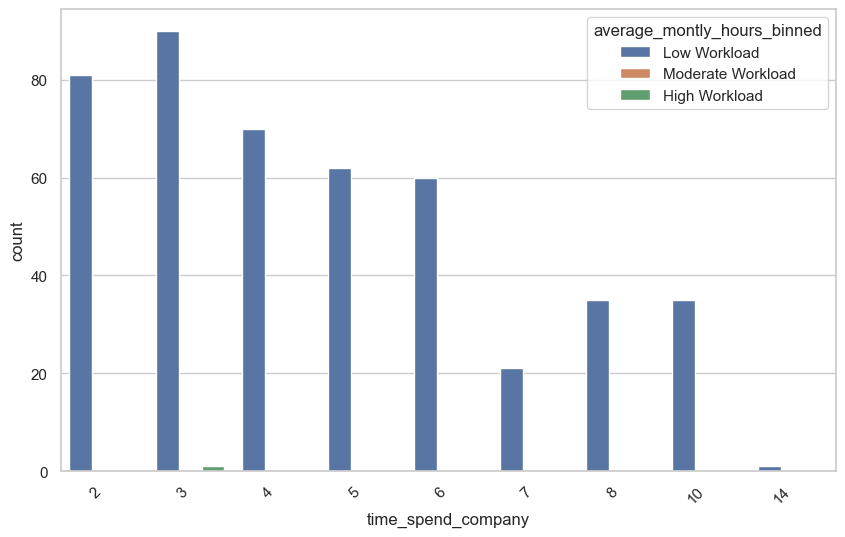

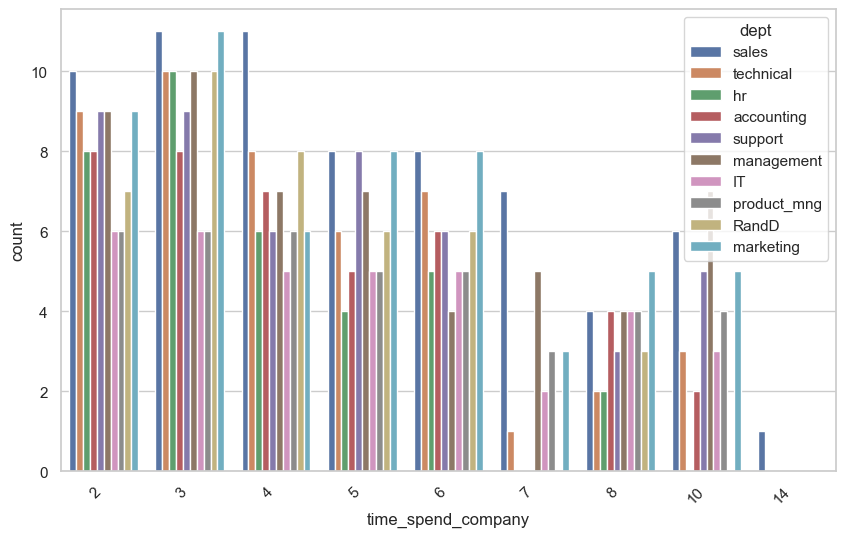

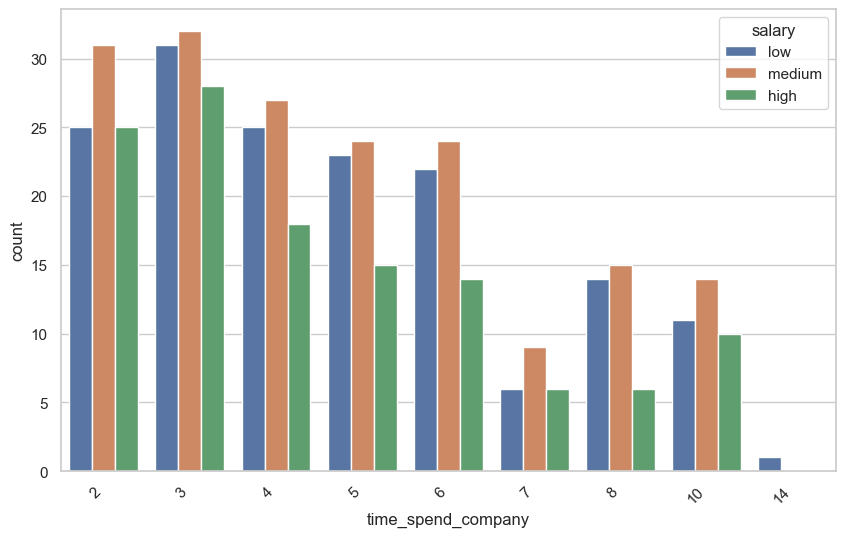

In [64]:
for col in categorical_vars2:
    if col != 'time_spend_company':
        sns.set(style="whitegrid")  # Optional: Set a grid style if desired

        #  Create the countplot with x-label rotation
        plt.figure(figsize=(10, 6))  # Optional: Set the figure size
        ax = sns.countplot(x= 'time_spend_company', hue= col, data=processed_df2)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-labels

        plt.show()

# Inference

## Interpretation of Data Analysis Findings:

1. A larger proportion of employees in the dataset have not received promotions.
2. There is a notable presence of employees with a tenure of 3 years in the company.
3. Among employees who received promotions, a significant number exhibit low evaluation scores.
4. Employees who were promoted tend to have a lower average monthly work hour count.

### This suggests a higher likelihood of employees leaving the company.

# Using a Rule-Based Approach 

In [65]:
# Developing a rule-based methodology for making predictions or classifications by utilizing predefined criteria derived from the inferences.


remark2 = []

for index, row in processed_df2.iterrows():
    # Condition 1: if no promotion or time spent in the company is 3 years
    condition1 = ((row['promotion_last_5years'] == 0) or (row['time_spend_company'] == 3))

    # Condition 2: if an employee received a promotion but had a low evaluation
    condition2 = ((row['promotion_last_5years'] != 0) and (row['last_evaluation_binned'] == 'low'))

    # Condition 3: if an employee received a promotion but had a low average monthly hour count
    condition3 = ((row['promotion_last_5years'] != 0) and (row['average_montly_hours_binned'] == 'low'))

    # Condition 4: If an employee's satisfaction level is high but their tenure in the company is less than three years or greater than four years
    condition4 = ((row['satisfaction_level_binned'] == 'high') and ((row['time_spend_company'] < 3) or (row['time_spend_company'] > 4)))

    
    if any([condition1, condition2, condition3, condition4]):  # Set to 1 if any condition is met
        remark2.append(1)
    else:
        remark2.append(0)


In [66]:
processed_df2["Remark"] = remark2

C:\Users\INTELLECT\AppData\Local\Temp\ipykernel_16188\633551680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df2["Remark"] = remark2


In [67]:
processed_df2["Remark"].value_counts()

1    388
0     68
Name: Remark, dtype: int64

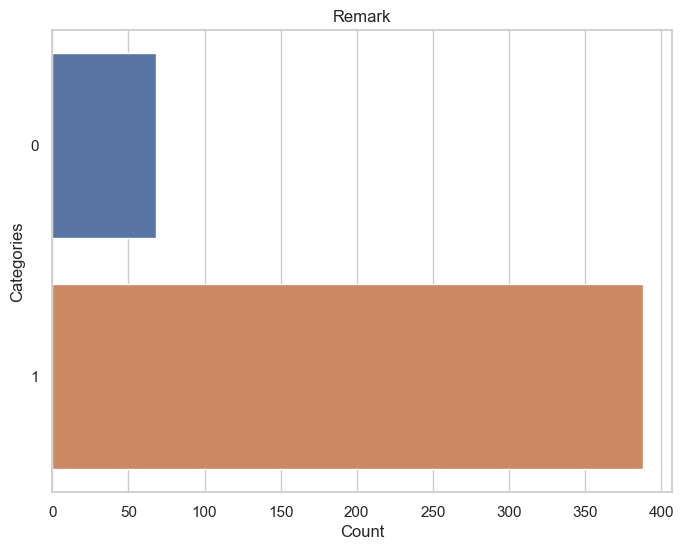

In [68]:
sizes = processed_df2["Remark"].value_counts()
# Create subplots
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.set_style("whitegrid")  # Optional: Set a background style
sns.barplot(x=sizes.values, y=sizes.index, orient='h')  # Horizontal bar chart

# Customize subplot
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title("Remark")

# Show subplot
plt.show()

In [69]:
processed_df2

,satisfaction_level_binned,last_evaluation_binned,number_project_binned,average_montly_hours_binned,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Remark
0,Unsatisfied,Low,Low Project,Low Workload,3,0,0,sales,low,1
1,Unsatisfied,Low,Low Project,Low Workload,14,0,0,sales,low,1
4,Unsatisfied,High,High Project,Low Workload,2,0,0,technical,low,1
5,Unsatisfied,Low,Low Project,Low Workload,4,0,0,sales,low,1
6,Satisfaied,Low,Low Project,Low Workload,4,0,1,sales,low,0
...,...,...,...,...,...,...,...,...,...,...
9970,Unsatisfied,Low,Low Project,Low Workload,6,1,0,marketing,high,1
9972,Unsatisfied,Low,Low Project,Low Workload,8,0,0,accounting,high,1
9973,Unsatisfied,Low,Low Project,Low Workload,8,0,0,IT,medium,1
9995,Unsatisfied,Low,Low Project,Low Workload,10,1,1,management,high,0


# Outcome from existing employees data 

### The following distribution of the "Remark" variable has been observed:

### Category 1: This category indicates that an employee is likely to leave the company and is found to have a count of 388 employees.
### Category 0: This category indicates that an employee is not likely to leave the company and is found to have a count of 68 employees.

### These findings provide insights into the classification of existing employees based on the inferred criteria. 

### 1. It indicates that a significant majority of existing employees (388 employees) are classified as likely to leave according to the same criteria applied to employees who have left the company. 
### 2. There is a presence of employees (68 employees) classified as not likely to leave (Category 0) based on the same criteria.

### This outcome highlights the potential accuracy of the inferences made through the rule-based approach for existing employees, suggesting that a substantial number of them are also classified as likely to leave the company. 